In [2]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
#Reading in all data of use
train_data = pd.read_csv('peter_data/train.csv')
test_data = pd.read_csv('peter_data/test.csv')
test_sample = pd.read_csv('peter_data/sample_submission.csv')

In [4]:
#Made sure there were no immediate issues with the structure of the data
test_data.shape
test_sample.shape

(1459, 2)

In [5]:
#Joined the test pricing data with the test x data just in case any rows were deleted during cleaning
merged_inner = pd.merge(left=test_data, right=test_sample, left_on='Id', right_on='Id')
merged_inner.shape

(1459, 81)

In [6]:
#set merged data equal to name test_data
test_data = merged_inner

In [7]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

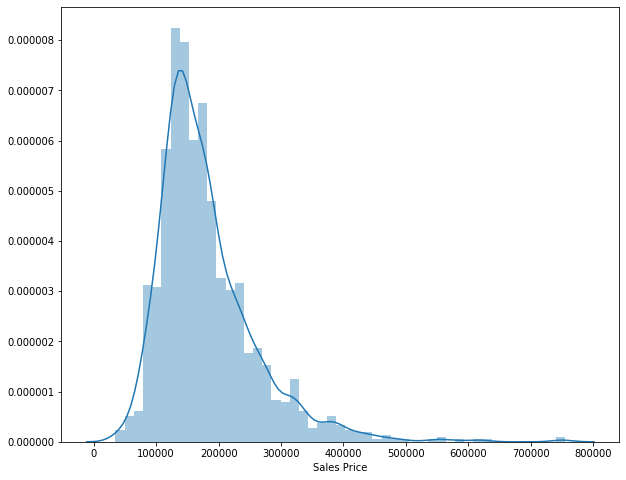

In [9]:
#Graphed test sales prices to check and see if there is a normal distribution. The distribution seems to be skewed to the left
# and will need to be either normalized or standardized
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
sns.distplot(train_data['SalePrice'], ax=ax1).set(xlabel='Sales Price');

In [10]:
#Changing numeric data into strings
train_data = train_data.replace({"MSSubClass": {20:"20Class",
                                30:"30Class",
                                40:"40Class",
                                45:"45Class",
                                50:"50Class",
                                60:"60Class",
                                70:"70Class",
                                75:"75Class",
                                80:"80Class",
                                85:"85Class",
                                90:"90Class",
                               120:"120Class",
                               150:"150Class",
                               160:"160Class",
                               180:"180Class",
                               190:"190Class"
                               }
                })

test_data = test_data.replace({"MSSubClass": {20:"20Class",
                                30:"30Class",
                                40:"40Class",
                                45:"45Class",
                                50:"50Class",
                                60:"60Class",
                                70:"70Class",
                                75:"75Class",
                                80:"80Class",
                                85:"85Class",
                                90:"90Class",
                               120:"120Class",
                               160:"160Class",
                               180:"180Class",
                               190:"190Class"
                               }
                })

In [11]:
#Creating a categorical data DataFrame
train_categorical_data= pd.DataFrame(train_data["Id"])
train_categorical_data["SalePrice"] = train_data["SalePrice"]
train_categorical_data

test_categorical_data= pd.DataFrame(test_data["Id"])
test_categorical_data["SalePrice"] = test_data["SalePrice"]
test_categorical_data

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [12]:
train_data["MSSubClass"] = train_data["MSSubClass"].astype('category')
train_categorical_data["MSSubClass"] = train_data["MSSubClass"]
train_data = train_data.drop(["MSSubClass"], axis=1)
train_categorical_data["MSZoning"] = train_data["MSZoning"].astype('category')
train_data = train_data.drop(["MSZoning"], axis=1)

test_data["MSSubClass"] = test_data["MSSubClass"].astype('category')
test_categorical_data["MSSubClass"] = test_data["MSSubClass"]
test_data = test_data.drop(["MSSubClass"], axis=1)
test_categorical_data["MSZoning"] = test_data["MSZoning"].astype('category')
test_data = test_data.drop(["MSZoning"], axis=1)

In [13]:
train_categorical_data["LotShape"] = train_data["LotShape"]
train_data = train_data.drop(["LotShape"], axis=1)

train_categorical_data["LotConfig"] = train_data["LotConfig"]
train_data = train_data.drop(["LotConfig"], axis=1)

# train_categorical_data["Neighborhood"] = train_data["Neighborhood"]
# train_data = train_data.drop(["Neighborhood"], axis=1)

train_categorical_data["Condition1"] = train_data["Condition1"]
train_data = train_data.drop(["Condition1"], axis=1)

train_categorical_data["Condition2"] = train_data["Condition2"]
train_data = train_data.drop(["Condition2"], axis=1)

train_categorical_data["BldgType"] = train_data["BldgType"]
train_data = train_data.drop(["BldgType"], axis=1)

train_categorical_data["HouseStyle"] = train_data["HouseStyle"]
train_data = train_data.drop(["HouseStyle"], axis=1)

train_categorical_data["RoofStyle"] = train_data["RoofStyle"]
train_data = train_data.drop(["RoofStyle"], axis=1)

train_categorical_data["RoofMatl"] = train_data["RoofMatl"]
train_data = train_data.drop(["RoofMatl"], axis=1)

train_categorical_data["Exterior1st"] = train_data["Exterior1st"]
train_data = train_data.drop(["Exterior1st"], axis=1)

train_categorical_data["Exterior2nd"] = train_data["Exterior2nd"]
train_data = train_data.drop(["Exterior2nd"], axis=1)

train_categorical_data["MasVnrType"] = train_data["MasVnrType"]
train_data = train_data.drop(["MasVnrType"], axis=1)

train_categorical_data["Foundation"] = train_data["Foundation"]
train_data = train_data.drop(["Foundation"], axis=1)

train_categorical_data["Heating"] = train_data["Heating"]
train_data = train_data.drop(["Heating"], axis=1)

train_categorical_data["Electrical"] = train_data["Electrical"]
train_data = train_data.drop(["Electrical"], axis=1)

train_categorical_data["GarageType"] = train_data["GarageType"]
train_data = train_data.drop(["GarageType"], axis=1)

train_categorical_data["SaleType"] = train_data["SaleType"]
train_data = train_data.drop(["SaleType"], axis=1)

train_categorical_data["SaleCondition"] = train_data["SaleCondition"]
train_data = train_data.drop(["SaleCondition"], axis=1)


C:\Users\pshap\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


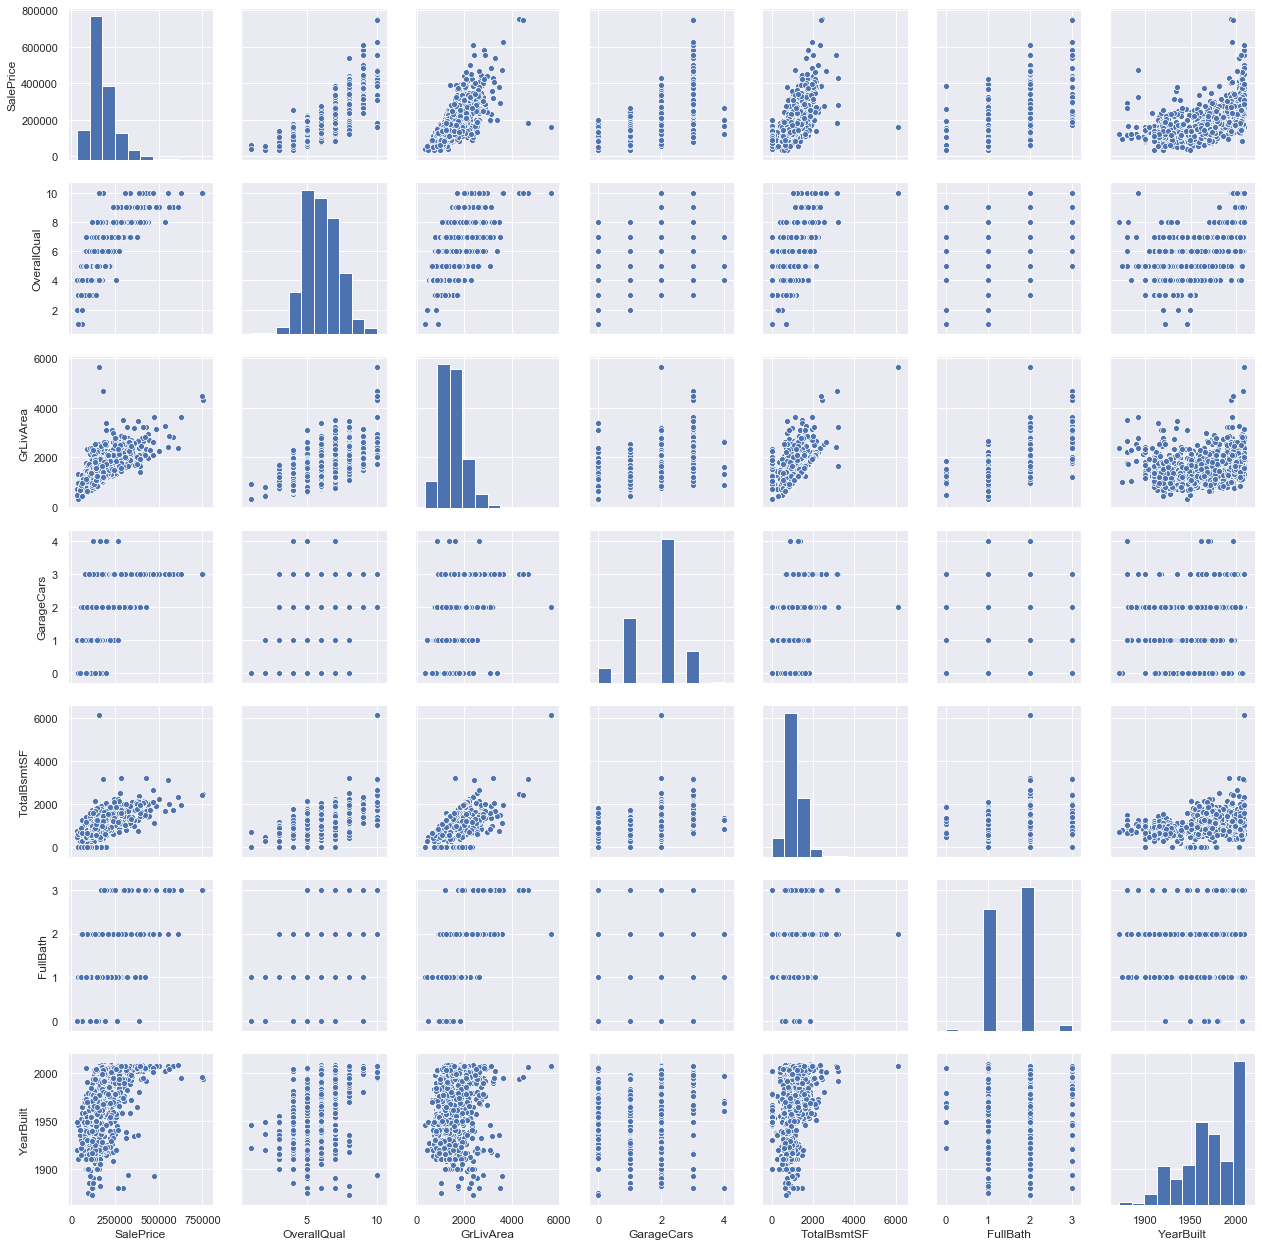

In [14]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], size = 2.5)
plt.show();

In [15]:
test_categorical_data["LotShape"] = test_data["LotShape"]
test_data = test_data.drop(["LotShape"], axis=1)

test_categorical_data["LotConfig"] = test_data["LotConfig"]
test_data = test_data.drop(["LotConfig"], axis=1)

# test_categorical_data["Neighborhood"] = test_data["Neighborhood"]
# test_data = test_data.drop(["Neighborhood"], axis=1)

test_categorical_data["Condition1"] = test_data["Condition1"]
test_data = test_data.drop(["Condition1"], axis=1)

test_categorical_data["Condition2"] = test_data["Condition2"]
test_data = test_data.drop(["Condition2"], axis=1)

test_categorical_data["BldgType"] = test_data["BldgType"]
test_data = test_data.drop(["BldgType"], axis=1)

test_categorical_data["HouseStyle"] = test_data["HouseStyle"]
test_data = test_data.drop(["HouseStyle"], axis=1)

test_categorical_data["RoofStyle"] = test_data["RoofStyle"]
test_data = test_data.drop(["RoofStyle"], axis=1)

test_categorical_data["RoofMatl"] = test_data["RoofMatl"]
test_data = test_data.drop(["RoofMatl"], axis=1)

test_categorical_data["Exterior1st"] = test_data["Exterior1st"]
test_data = test_data.drop(["Exterior1st"], axis=1)

test_categorical_data["Exterior2nd"] = test_data["Exterior2nd"]
test_data = test_data.drop(["Exterior2nd"], axis=1)

test_categorical_data["MasVnrType"] = test_data["MasVnrType"]
test_data = test_data.drop(["MasVnrType"], axis=1)

test_categorical_data["Foundation"] = test_data["Foundation"]
test_data = test_data.drop(["Foundation"], axis=1)

test_categorical_data["Heating"] = test_data["Heating"]
test_data = test_data.drop(["Heating"], axis=1)

test_categorical_data["Electrical"] = test_data["Electrical"]
test_data = test_data.drop(["Electrical"], axis=1)

test_categorical_data["GarageType"] = test_data["GarageType"]
test_data = test_data.drop(["GarageType"], axis=1)

test_categorical_data["SaleType"] = test_data["SaleType"]
test_data = test_data.drop(["SaleType"], axis=1)

test_categorical_data["SaleCondition"] = test_data["SaleCondition"]
test_data = test_data.drop(["SaleCondition"], axis=1)


In [16]:
train_categorical_data

,Id,SalePrice,MSSubClass,MSZoning,LotShape,LotConfig,Condition1,Condition2,BldgType,HouseStyle,...,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,SaleType,SaleCondition
0,1,208500,60Class,RL,Reg,Inside,Norm,Norm,1Fam,2Story,...,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,WD,Normal
1,2,181500,20Class,RL,Reg,FR2,Feedr,Norm,1Fam,1Story,...,CompShg,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Attchd,WD,Normal
2,3,223500,60Class,RL,IR1,Inside,Norm,Norm,1Fam,2Story,...,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,WD,Normal
3,4,140000,70Class,RL,IR1,Corner,Norm,Norm,1Fam,2Story,...,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,WD,Abnorml
4,5,250000,60Class,RL,IR1,FR2,Norm,Norm,1Fam,2Story,...,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175000,60Class,RL,Reg,Inside,Norm,Norm,1Fam,2Story,...,CompShg,VinylSd,VinylSd,None,PConc,GasA,SBrkr,Attchd,WD,Normal
1456,1457,210000,20Class,RL,Reg,Inside,Norm,Norm,1Fam,1Story,...,CompShg,Plywood,Plywood,Stone,CBlock,GasA,SBrkr,Attchd,WD,Normal
1457,1458,266500,70Class,RL,Reg,Inside,Norm,Norm,1Fam,2Story,...,CompShg,CemntBd,CmentBd,None,Stone,GasA,SBrkr,Attchd,WD,Normal
1458,1459,142125,20Class,RL,Reg,Inside,Norm,Norm,1Fam,1Story,...,CompShg,MetalSd,MetalSd,None,CBlock,GasA,FuseA,Attchd,WD,Normal


In [17]:
print(train_data.isnull().sum().sort_values(ascending=False).head(25))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageCond        81
GarageYrBlt       81
GarageFinish      81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrArea         8
ExterCond          0
SalePrice          0
ExterQual          0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
BsmtFinSF1         0
YearBuilt          0
YearRemodAdd       0
dtype: int64


In [16]:
train_data.loc[:, "MasVnrArea"] = train_data.loc[:, "MasVnrArea"].fillna("0")
train_data.loc[:, "BsmtFinType1"] = train_data.loc[:, "BsmtFinType1"].fillna("0")
train_data.loc[:, "BsmtQual"] = train_data.loc[:, "BsmtQual"].fillna("0")
train_data.loc[:, "BsmtCond"] = train_data.loc[:, "BsmtCond"].fillna("0")
train_data.loc[:, "BsmtExposure"] = train_data.loc[:, "BsmtExposure"].fillna("0")
train_data.loc[:, "BsmtFinType2"] = train_data.loc[:, "BsmtFinType2"].fillna("0")
train_data.loc[:, "GarageQual"] = train_data.loc[:, "GarageQual"].fillna("0")
train_data.loc[:, "GarageCond"] = train_data.loc[:, "GarageCond"].fillna("0")
train_data.loc[:, "GarageFinish"] = train_data.loc[:, "GarageFinish"].fillna("0")

train_data.loc[:, "GarageYrBlt"] = train_data.loc[:, "GarageYrBlt"].fillna(train_data["GarageYrBlt"].mean())

train_data.loc[:, "LotFrontage"] = train_data.loc[:, "LotFrontage"].fillna(train_data["LotFrontage"].mean())

train_data.loc[:, "FireplaceQu"] = train_data.loc[:, "FireplaceQu"].fillna("0")
train_data.loc[:, "Fence"] = train_data.loc[:, "Fence"].fillna("0")
train_data.loc[:, "Alley"] = train_data.loc[:, "Alley"].fillna("0")
train_data.loc[:, "MiscFeature"] = train_data.loc[:, "MiscFeature"].fillna("0")
train_data.loc[:, "PoolQC"] = train_data.loc[:, "PoolQC"].fillna("0")

In [17]:
test_data.loc[:, "MasVnrArea"] = test_data.loc[:, "MasVnrArea"].fillna("0")
test_data.loc[:, "BsmtFinType1"] = test_data.loc[:, "BsmtFinType1"].fillna("0")
test_data.loc[:, "BsmtQual"] = test_data.loc[:, "BsmtQual"].fillna("0")
test_data.loc[:, "BsmtCond"] = test_data.loc[:, "BsmtCond"].fillna("0")
test_data.loc[:, "BsmtExposure"] = test_data.loc[:, "BsmtExposure"].fillna("0")
test_data.loc[:, "BsmtFinType2"] = test_data.loc[:, "BsmtFinType2"].fillna("0")
test_data.loc[:, "GarageQual"] = test_data.loc[:, "GarageQual"].fillna("0")
test_data.loc[:, "GarageCond"] = test_data.loc[:, "GarageCond"].fillna("0")
test_data.loc[:, "GarageFinish"] = test_data.loc[:, "GarageFinish"].fillna("0")

test_data.loc[:, "GarageYrBlt"] = test_data.loc[:, "GarageYrBlt"].fillna(test_data["GarageYrBlt"].mean())

test_data.loc[:, "LotFrontage"] = test_data.loc[:, "LotFrontage"].fillna(test_data["LotFrontage"].mean())

test_data.loc[:, "FireplaceQu"] = test_data.loc[:, "FireplaceQu"].fillna("0")
test_data.loc[:, "Fence"] = test_data.loc[:, "Fence"].fillna("0")
test_data.loc[:, "Alley"] = test_data.loc[:, "Alley"].fillna("0")
test_data.loc[:, "MiscFeature"] = test_data.loc[:, "MiscFeature"].fillna("0")
test_data.loc[:, "PoolQC"] = test_data.loc[:, "PoolQC"].fillna("0")


In [20]:
# test_data.dropna(subset=['MSZoning'])

In [21]:
print(test_data.isnull().sum().sort_values(ascending=False).head(20))

Functional      2
BsmtFullBath    2
BsmtHalfBath    2
Utilities       2
GarageCars      1
GarageArea      1
TotalBsmtSF     1
BsmtUnfSF       1
BsmtFinSF2      1
BsmtFinSF1      1
KitchenQual     1
BsmtCond        0
BsmtExposure    0
BsmtFinType2    0
BsmtFinType1    0
ExterCond       0
HeatingQC       0
BsmtQual        0
SalePrice       0
1stFlrSF        0
dtype: int64


In [22]:
pd.set_option('display.max_columns', None)
train_data

,Id,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,Pave,0,Lvl,AllPub,Gtl,CollgCr,7,5,2003,2003,196,Gd,TA,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,Pave,0,Lvl,AllPub,Gtl,Veenker,6,8,1976,1976,0,TA,TA,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,Pave,0,Lvl,AllPub,Gtl,CollgCr,7,5,2001,2002,162,Gd,TA,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,Pave,0,Lvl,AllPub,Gtl,Crawfor,7,5,1915,1970,0,TA,TA,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,0,0,0,2,2006,140000
4,5,84.0,14260,Pave,0,Lvl,AllPub,Gtl,NoRidge,8,5,2000,2000,350,Gd,TA,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,Pave,0,Lvl,AllPub,Gtl,Gilbert,6,5,1999,2000,0,TA,TA,Gd,TA,No,Unf,0,Unf,0,953,953,Ex,Y,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,0,0,0,8,2007,175000
1456,1457,85.0,13175,Pave,0,Lvl,AllPub,Gtl,NWAmes,6,6,1978,1988,119,TA,TA,Gd,TA,No,ALQ,790,Rec,163,589,1542,TA,Y,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,MnPrv,0,0,2,2010,210000
1457,1458,66.0,9042,Pave,0,Lvl,AllPub,Gtl,Crawfor,7,9,1941,2006,0,Ex,Gd,TA,Gd,No,GLQ,275,Unf,0,877,1152,Ex,Y,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,0,GdPrv,Shed,2500,5,2010,266500
1458,1459,68.0,9717,Pave,0,Lvl,AllPub,Gtl,NAmes,5,6,1950,1996,0,TA,TA,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gd,Y,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,0,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,0,0,0,4,2010,142125


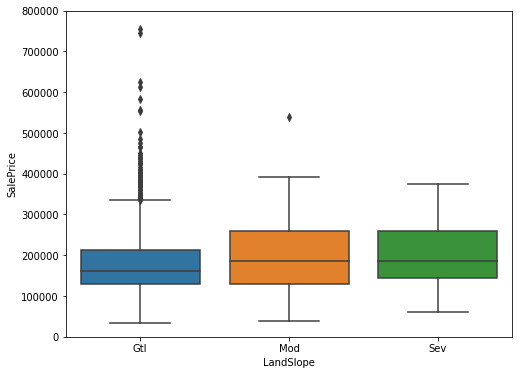

In [23]:
#box plot overallqual/saleprice
var = 'LandSlope'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [ ]:
#compute anova

In [24]:
 train_data = train_data.replace({
#     "Alley" : {"Grvl" : 1, "Pave" : 2, "None" :0},
#     "LandContour": {"Lvl":
     "Utilities": {"AllPub": 1, "NoSeWa":0},
#     "LandSlope"
     "ExterQual": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4 },
     "ExterCond": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4 },
     "BsmtQual": {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5 },
     "BsmtCond": {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
     "BsmtExposure": {"No": 0, "None": 0, "Mn": 1, "Av": 2, "Gd": 3},
     "BsmtFinType1": {"None": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6},
     "BsmtFinType2": {"None": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6},
     "HeatingQC": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4 },
     "KitchenQual": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4 },
     "Functional": {"Sal": 0, "Sev": 1, "Maj2": 2, "Maj1": 3, "Mod": 4, "Min2":5, "Min1": 6, "Typ": 7},
     "FireplaceQu": {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
     "GarageFinish": {"None": 0, "Unf": 1, "RFn": 2, "Fin":3},
     "GarageQual": {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
     "GarageCond": {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
     
     
     "PavedDrive": {"N": 0, "P": 1, "Y": 2},
     "PoolQC": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4 },
     "Fence": {"None": 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4},
     "MiscFeature": {"None": 0, "TenC": 1, "Shed": 1, "Othr": 1, "Gar2": 1, "Elev": 1}
     
 })

In [25]:
train_categorical_data["LandContour"] = train_data["LandContour"]
train_data = train_data.drop(["LandContour"], axis=1)

train_categorical_data["LandSlope"] = train_data["LandSlope"]
train_data = train_data.drop(["LandSlope"], axis=1)

train_categorical_data["Alley"] = train_data["Alley"]
train_data = train_data.drop(["Alley"], axis=1)
# train_categorical_data["Utilities"] = train_data["Utilities"]
# train_data = train_data.drop(["Utilities"], axis=1)

In [26]:
train_data['Neighborhood'] = train_data['Neighborhood'].astype('category')
train_data['Neighborhood'] = train_data['Neighborhood'].cat.codes

In [27]:
train_data = pd.get_dummies(train_data, columns=['Street','CentralAir'])
train_data

,Id,LotFrontage,LotArea,Utilities,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice,Street_Grvl,Street_Pave,CentralAir_N,CentralAir_Y
0,1,65.0,8450,1,5,7,5,2003,2003,196,3,2,4,3,0,6,706,1,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,0,2003.0,2,2,548,3,3,2,0,61,0,0,0,0,0,0,0,0,2,2008,208500,0,1,0,1
1,2,80.0,9600,1,24,6,8,1976,1976,0,2,2,4,3,3,5,978,1,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,2,6,7,1,3,1976.0,2,2,460,3,3,2,298,0,0,0,0,0,0,0,0,0,5,2007,181500,0,1,0,1
2,3,68.0,11250,1,5,7,5,2001,2002,162,3,2,4,3,1,6,486,1,0,434,920,4,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,3,2001.0,2,2,608,3,3,2,0,42,0,0,0,0,0,0,0,0,9,2008,223500,0,1,0,1
3,4,60.0,9550,1,6,7,5,1915,1970,0,2,2,3,4,0,5,216,1,0,540,756,3,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,4,1998.0,1,3,642,3,3,2,0,35,272,0,0,0,0,0,0,0,2,2006,140000,0,1,0,1
4,5,84.0,14260,1,15,8,5,2000,2000,350,3,2,4,3,2,6,655,1,0,490,1145,4,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,3,2000.0,2,3,836,3,3,2,192,84,0,0,0,0,0,0,0,0,12,2008,250000,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,1,8,6,5,1999,2000,0,2,2,4,3,0,1,0,1,0,953,953,4,953,694,0,1647,0,0,2,1,3,1,2,7,7,1,3,1999.0,2,2,460,3,3,2,0,40,0,0,0,0,0,0,0,0,8,2007,175000,0,1,0,1
1456,1457,85.0,13175,1,14,6,6,1978,1988,119,2,2,4,3,0,5,790,3,163,589,1542,2,2073,0,0,2073,1,0,2,0,3,1,2,7,6,2,3,1978.0,1,2,500,3,3,2,349,0,0,0,0,0,0,3,0,0,2,2010,210000,0,1,0,1
1457,1458,66.0,9042,1,6,7,9,1941,2006,0,4,3,3,4,0,6,275,1,0,877,1152,4,1188,1152,0,2340,0,0,2,0,4,1,3,9,7,2,4,1941.0,2,1,252,3,3,2,0,60,0,0,0,0,0,4,1,2500,5,2010,266500,0,1,0,1
1458,1459,68.0,9717,1,12,5,6,1950,1996,0,2,2,3,3,1,6,49,3,1029,0,1078,3,1078,0,0,1078,1,0,1,0,2,1,3,5,7,0,0,1950.0,1,1,240,3,3,2,366,0,112,0,0,0,0,0,0,0,4,2010,142125,0,1,0,1


In [28]:
train_data = train_data.rename(columns={"Street_Pave": "Street_Paved", "CentralAir_Y": "CentralAir_Yes"})
train_data = train_data.drop(['Street_Grvl','CentralAir_N'], axis=1)

In [29]:
pd.set_option('display.max_columns', None)
train_data

,Id,LotFrontage,LotArea,Utilities,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice,Street_Paved,CentralAir_Yes
0,1,65.0,8450,1,5,7,5,2003,2003,196,3,2,4,3,0,6,706,1,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,0,2003.0,2,2,548,3,3,2,0,61,0,0,0,0,0,0,0,0,2,2008,208500,1,1
1,2,80.0,9600,1,24,6,8,1976,1976,0,2,2,4,3,3,5,978,1,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,2,6,7,1,3,1976.0,2,2,460,3,3,2,298,0,0,0,0,0,0,0,0,0,5,2007,181500,1,1
2,3,68.0,11250,1,5,7,5,2001,2002,162,3,2,4,3,1,6,486,1,0,434,920,4,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,3,2001.0,2,2,608,3,3,2,0,42,0,0,0,0,0,0,0,0,9,2008,223500,1,1
3,4,60.0,9550,1,6,7,5,1915,1970,0,2,2,3,4,0,5,216,1,0,540,756,3,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,4,1998.0,1,3,642,3,3,2,0,35,272,0,0,0,0,0,0,0,2,2006,140000,1,1
4,5,84.0,14260,1,15,8,5,2000,2000,350,3,2,4,3,2,6,655,1,0,490,1145,4,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,3,2000.0,2,3,836,3,3,2,192,84,0,0,0,0,0,0,0,0,12,2008,250000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,1,8,6,5,1999,2000,0,2,2,4,3,0,1,0,1,0,953,953,4,953,694,0,1647,0,0,2,1,3,1,2,7,7,1,3,1999.0,2,2,460,3,3,2,0,40,0,0,0,0,0,0,0,0,8,2007,175000,1,1
1456,1457,85.0,13175,1,14,6,6,1978,1988,119,2,2,4,3,0,5,790,3,163,589,1542,2,2073,0,0,2073,1,0,2,0,3,1,2,7,6,2,3,1978.0,1,2,500,3,3,2,349,0,0,0,0,0,0,3,0,0,2,2010,210000,1,1
1457,1458,66.0,9042,1,6,7,9,1941,2006,0,4,3,3,4,0,6,275,1,0,877,1152,4,1188,1152,0,2340,0,0,2,0,4,1,3,9,7,2,4,1941.0,2,1,252,3,3,2,0,60,0,0,0,0,0,4,1,2500,5,2010,266500,1,1
1458,1459,68.0,9717,1,12,5,6,1950,1996,0,2,2,3,3,1,6,49,3,1029,0,1078,3,1078,0,0,1078,1,0,1,0,2,1,3,5,7,0,0,1950.0,1,1,240,3,3,2,366,0,112,0,0,0,0,0,0,0,4,2010,142125,1,1


In [30]:
X_train = train_data.drop(['SalePrice','Id'], axis=1)
y_train= pd.DataFrame(train_data['SalePrice'])

In [31]:
X_test = test_data.drop(['SalePrice','Id'], axis=1)
y_test= test_data['SalePrice']

In [32]:
print(train_data.dtypes.head())

Id                int64
LotFrontage     float64
LotArea           int64
Utilities         int64
Neighborhood       int8
dtype: object


In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [29]:
X_train.infer_objects()

,LotFrontage,LotArea,Utilities,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,Street_Paved,CentralAir_Yes
0,65.0,8450,1,5,7,5,2003,2003,196,3,2,4,3,0,6,706,1,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,0,2003.0,2,2,548,3,3,2,0,61,0,0,0,0,0,0,0,0,2,2008,1,1
1,80.0,9600,1,24,6,8,1976,1976,0,2,2,4,3,3,5,978,1,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,2,6,7,1,3,1976.0,2,2,460,3,3,2,298,0,0,0,0,0,0,0,0,0,5,2007,1,1
2,68.0,11250,1,5,7,5,2001,2002,162,3,2,4,3,1,6,486,1,0,434,920,4,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,3,2001.0,2,2,608,3,3,2,0,42,0,0,0,0,0,0,0,0,9,2008,1,1
3,60.0,9550,1,6,7,5,1915,1970,0,2,2,3,4,0,5,216,1,0,540,756,3,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,4,1998.0,1,3,642,3,3,2,0,35,272,0,0,0,0,0,0,0,2,2006,1,1
4,84.0,14260,1,15,8,5,2000,2000,350,3,2,4,3,2,6,655,1,0,490,1145,4,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,3,2000.0,2,3,836,3,3,2,192,84,0,0,0,0,0,0,0,0,12,2008,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1,8,6,5,1999,2000,0,2,2,4,3,0,1,0,1,0,953,953,4,953,694,0,1647,0,0,2,1,3,1,2,7,7,1,3,1999.0,2,2,460,3,3,2,0,40,0,0,0,0,0,0,0,0,8,2007,1,1
1456,85.0,13175,1,14,6,6,1978,1988,119,2,2,4,3,0,5,790,3,163,589,1542,2,2073,0,0,2073,1,0,2,0,3,1,2,7,6,2,3,1978.0,1,2,500,3,3,2,349,0,0,0,0,0,0,3,0,0,2,2010,1,1
1457,66.0,9042,1,6,7,9,1941,2006,0,4,3,3,4,0,6,275,1,0,877,1152,4,1188,1152,0,2340,0,0,2,0,4,1,3,9,7,2,4,1941.0,2,1,252,3,3,2,0,60,0,0,0,0,0,4,1,2500,5,2010,1,1
1458,68.0,9717,1,12,5,6,1950,1996,0,2,2,3,3,1,6,49,3,1029,0,1078,3,1078,0,0,1078,1,0,1,0,2,1,3,5,7,0,0,1950.0,1,1,240,3,3,2,366,0,112,0,0,0,0,0,0,0,4,2010,1,1


In [41]:
X_train.dtypes.head()

LotFrontage     float64
LotArea           int64
Utilities         int64
Neighborhood       int8
OverallQual       int64
dtype: object

In [31]:
X_train["MasVnrArea"].astype('str').astype('float')
X_train["ExterQual"].astype('str').astype('int')
X_train["BsmtCond"].astype('str').astype('int')
X_train["BsmtExposure"].astype('str').astype('int')
X_train["HeatingQC"].astype('str').astype('int')
X_train["Functional"].astype('str').astype('int')
X_train["PoolQC"].astype('str').astype('int')
X_train["MiscFeature"].astype('str').astype('int')

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    1
1458    0
1459    0
Name: MiscFeature, Length: 1460, dtype: int32

In [39]:
y_train.shape

(1460, 1)

In [40]:
X_scaler = StandardScaler().fit(X_train)
#y_train["SalePrice"].values.reshape(-1, 1)
y_scaler = StandardScaler().fit(y_train)

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
y = train_data['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

In [ ]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)

missing_values = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
missing_values.head(20)

In [ ]:
train_data.shape